In [1]:
## Import Packages
import numpy as np
import _pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
Source = '/Volumes/eSSD0/Papers/GMD_CanESM_p1/'

In [3]:
#load in cloud feedbacks and dimensions as needed
Models = ['CanESM5_p2']

data_sw = {}
data_lw = {}

data_sw['CanESM2'] = pk.load(open(Source+'Data/CanESM2/Fluxes/CanESM2_TrCLsw_FLUX_FB_SRdecomp_Grid.pi','rb'))
data_lw['CanESM2'] = pk.load(open(Source+'Data/CanESM2/Fluxes/CanESM2_TrCLlw_FLUX_FB_SRdecomp_Grid.pi','rb'))   

data_sw['CanESM5_p2'] = pk.load(open(Source+'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_SRdecomp_Grid.pi','rb'))
data_lw['CanESM5_p2'] = pk.load(open(Source+'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_SRdecomp_Grid.pi','rb'))  

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [4]:
#take the global, annual mean
data_lw_SRgam = dict()
data_sw_SRgam = dict()
for mods in data_sw.keys():
    data_sw_SRgam[mods] = dict()
    data_lw_SRgam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_SRgam[mods][prop] = np.average(data_sw[mods][prop],weights=coslat)
        data_lw_SRgam[mods][prop] = np.average(data_lw[mods][prop],weights=coslat)


#take the global, annual mean
#data_lw_gam = dict()
#data_sw_gam = dict()
#for mods in data_sw.keys():
#    data_sw_gam[mods] = dict()
#    data_lw_gam[mods] = dict()
#    
#    for prop in data_sw[mods].keys():
#        data_sw_gam[mods][prop] = dict()
#        data_lw_gam[mods][prop] = dict()
#        
#        for ctp in data_sw[mods][prop].keys():
#            data_sw_gam[mods][prop][ctp] = np.average(data_sw[mods][prop][ctp],weights=coslat)
#            data_lw_gam[mods][prop][ctp] = np.average(data_lw[mods][prop][ctp],weights=coslat)

In [6]:
for mods in data_sw_SRgam.keys():
    data_sw_SRgam[mods]['Hi_obs'] = data_sw_SRgam[mods]['Low']-data_sw_SRgam[mods]['Low_unobscured']
    data_lw_SRgam[mods]['Hi_obs'] = data_lw_SRgam[mods]['Low']-data_lw_SRgam[mods]['Low_unobscured']

    data_sw_SRgam[mods]['Hi_cor'] = data_sw_SRgam[mods]['Hi']+data_sw_SRgam[mods]['Hi_obs']
    data_lw_SRgam[mods]['Hi_cor'] = data_lw_SRgam[mods]['Hi']+data_lw_SRgam[mods]['Hi_obs']

    
print(data_sw_SRgam['CanESM2'].keys())

dict_keys(['Low', 'Low_unobscured', 'Hi', 'Hi_obs', 'Hi_cor'])


In [7]:
for mods in data_sw_SRgam.keys():
    print(mods)
    for height in data_sw_SRgam[mods].keys():
        if height == 'Hi' or height == 'Hi_obs':
            pass
        else:
            print(height, '\n')
            print('SW - ',round(data_sw_SRgam[mods][height],2))
            print('LW - ',round(data_lw_SRgam[mods][height],2))
            print('\n')

CanESM2
Low 

SW -  0.34
LW -  -0.01


Low_unobscured 

SW -  0.21
LW -  0.01


Hi_cor 

SW -  -0.46
LW -  0.74


CanESM5_p2
Low 

SW -  0.53
LW -  -0.05


Low_unobscured 

SW -  0.42
LW -  -0.03


Hi_cor 

SW -  -0.35
LW -  0.75




In [9]:
for mods in data_sw_SRgam.keys():
    print(mods)

    print('SW net - ',data_sw_SRgam[mods]['Low']+data_sw_SRgam[mods]['Hi'])
    print('LW net - ',data_lw_SRgam[mods]['Low']+data_lw_SRgam[mods]['Hi'])

CanESM2
SW net -  -0.2577569535523195
LW net -  0.7428676324248744
CanESM5_p2
SW net -  0.07601101189286069
LW net -  0.7164673302497605


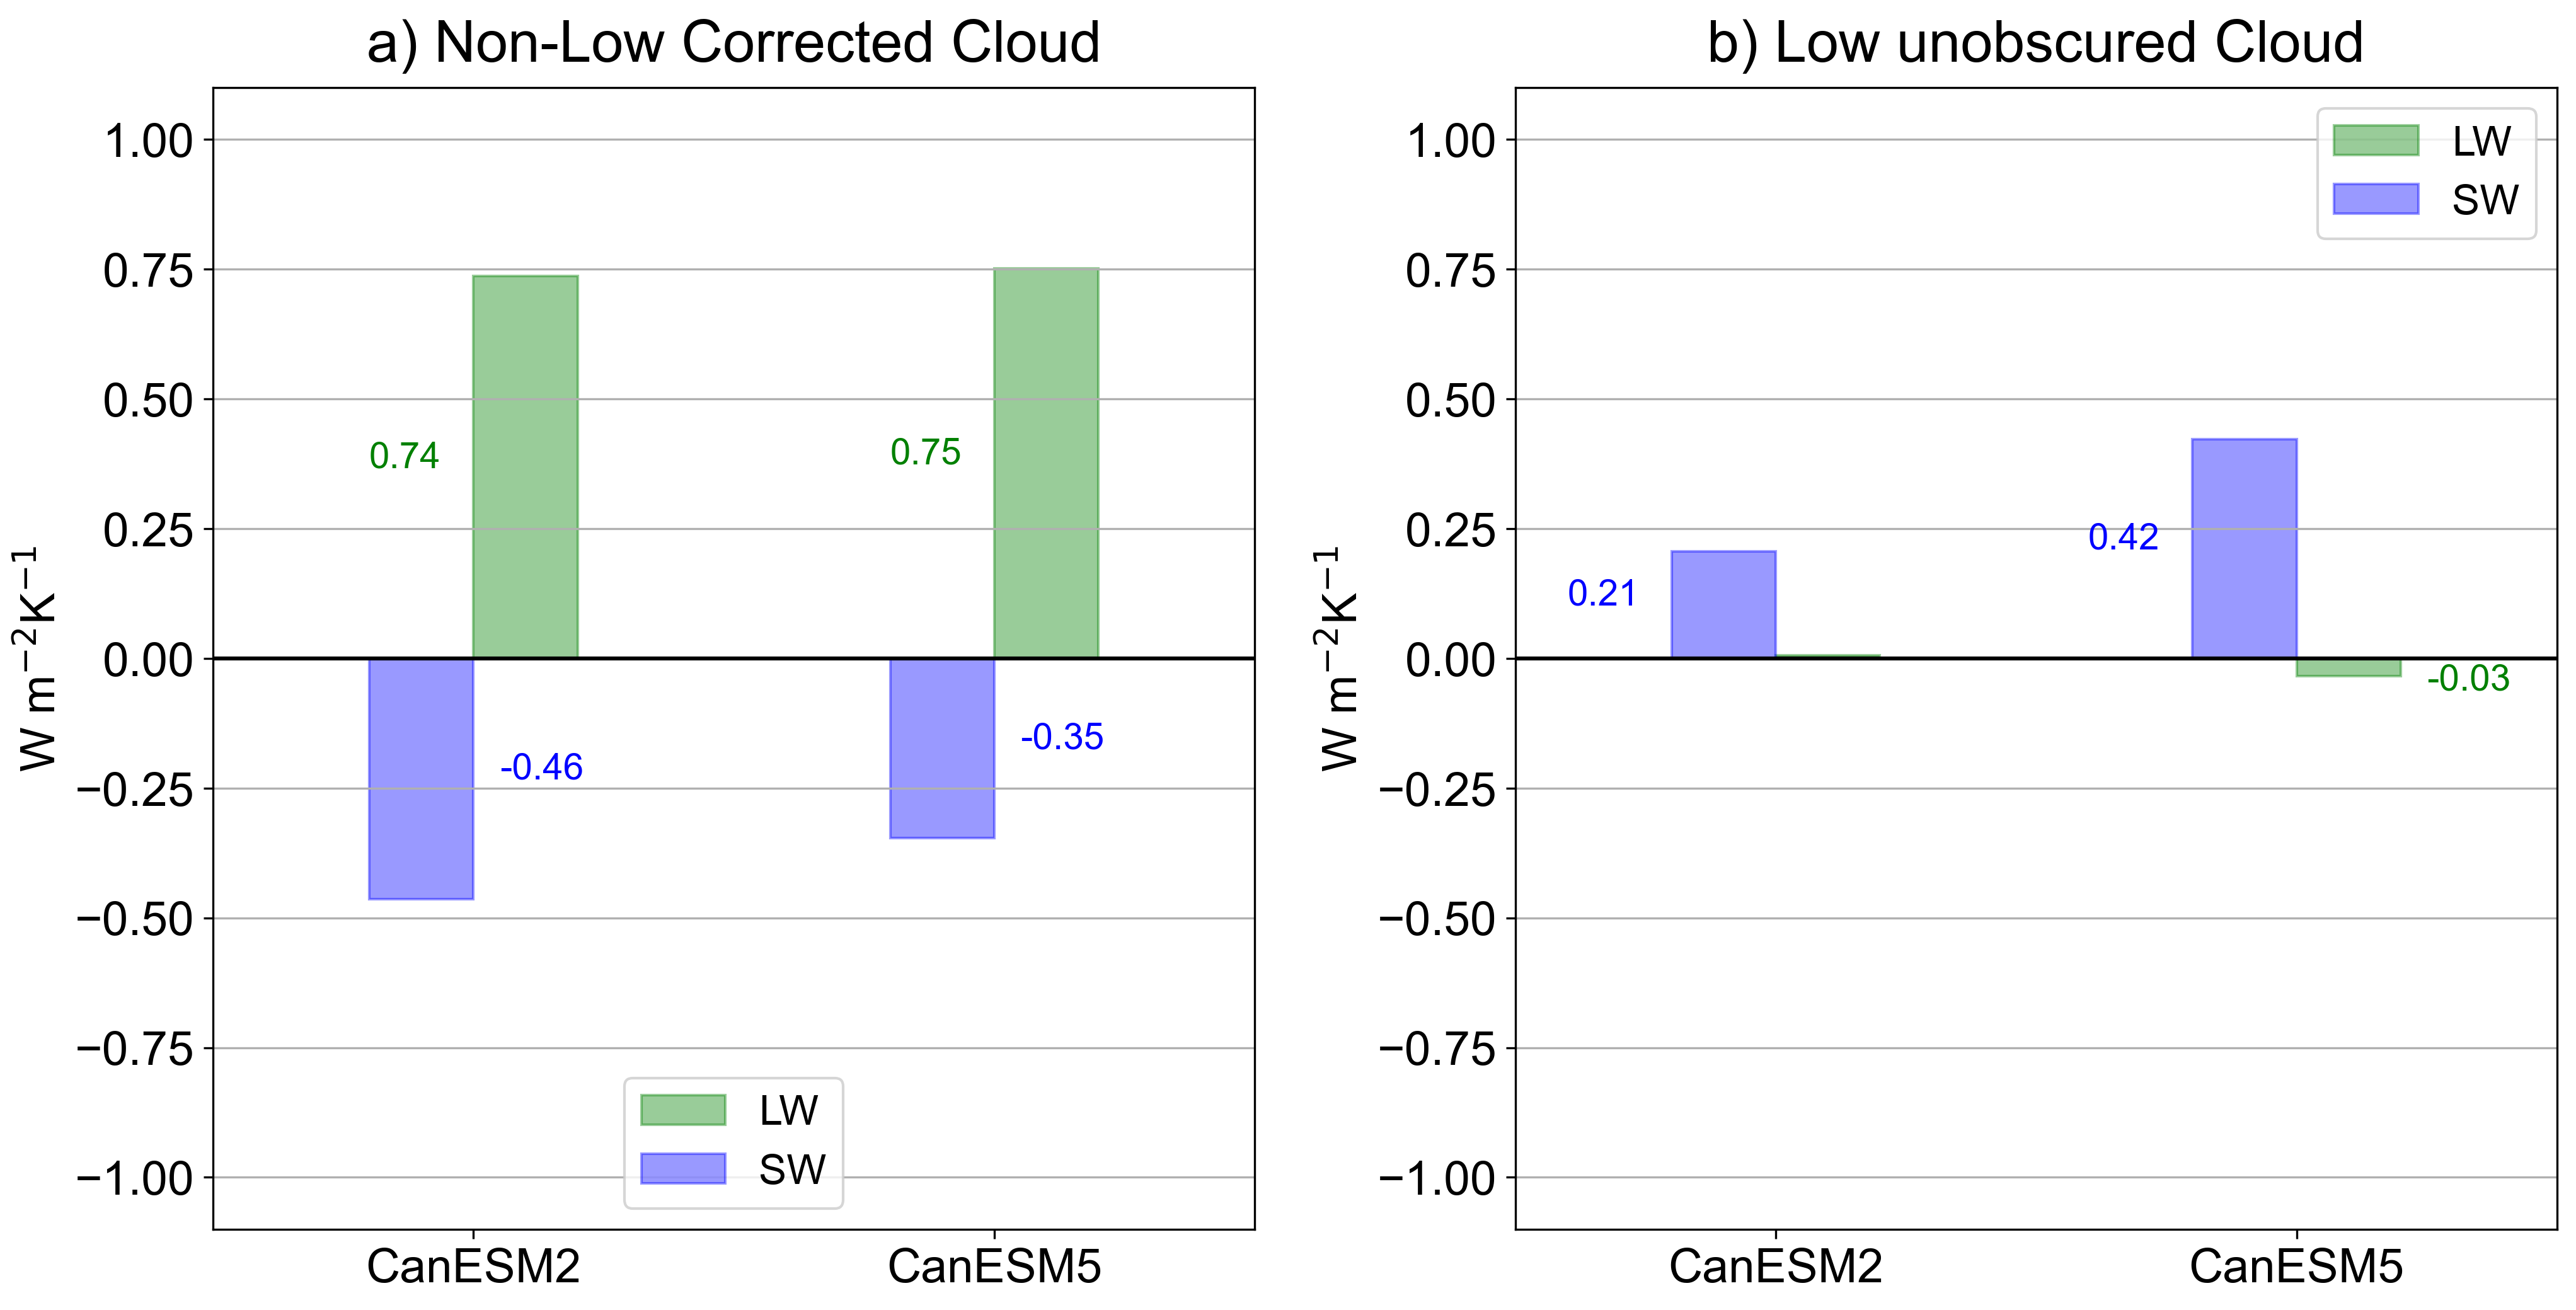

In [8]:
plt.figure(figsize=(16,8),dpi=300)
plt.subplot(121)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('a) Non-Low Corrected Cloud',fontsize=22,pad=10)
#CanESM2


#
plt.bar(1,data_lw_SRgam['CanESM2']['Hi_cor'],align='edge',width=0.4,color='green',alpha=0.4,edgecolor='green',label='LW')
plt.text(0.6,data_lw_SRgam['CanESM2']['Hi_cor']/2,str(round(data_lw_SRgam['CanESM2']['Hi_cor'],2)),color='green',fontsize=14)

plt.bar(1,data_sw_SRgam['CanESM2']['Hi_cor'],align='edge',width=-0.4,color='blue',alpha=0.4,edgecolor='blue',label='SW')
plt.text(1.1,data_sw_SRgam['CanESM2']['Hi_cor']/2,str(round(data_sw_SRgam['CanESM2']['Hi_cor'],2)),color='blue',fontsize=14)


plt.bar(3,data_lw_SRgam['CanESM5_p2']['Hi_cor'],align='edge',width=0.4,color='green',alpha=0.4,edgecolor='green')
plt.text(2.6,data_lw_SRgam['CanESM5_p2']['Hi_cor']/2,str(round(data_lw_SRgam['CanESM5_p2']['Hi_cor'],2)),color='green',fontsize=14)

plt.bar(3,data_sw_SRgam['CanESM5_p2']['Hi_cor'],align='edge',width=-0.4,color='blue',alpha=0.4,edgecolor='blue')
plt.text(3.1,data_sw_SRgam['CanESM5_p2']['Hi_cor']/2,str(round(data_sw_SRgam['CanESM5_p2']['Hi_cor'],2)),color='blue',fontsize=14)

plt.xlim(0,4)
plt.axhline(0,color='k')
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.ylim(-1.1,1.1)
plt.yticks(fontsize=18)
plt.legend(loc='lower center',fontsize=16)

plt.grid(axis='y')
#plt.axhline(0,color='k')
#------------
#SHORTWAVE
#------------
plt.subplot(122)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('b) Low unobscured Cloud',fontsize=22,pad=10)

plt.bar(1,data_lw_SRgam['CanESM2']['Low_unobscured'],align='edge',width=0.4,color='green',alpha=0.4,edgecolor='green',label='LW')
#plt.text(0.6,data_lw_SRgam['CanESM2']['Low_unobscured']/2,str(round(data_lw_SRgam['CanESM2']['Low_unobscured'],2)),color='green',fontsize=14)

plt.bar(1,data_sw_SRgam['CanESM2']['Low_unobscured'],align='edge',width=-0.4,color='blue',alpha=0.4,edgecolor='blue',label='SW')
plt.text(0.2,data_sw_SRgam['CanESM2']['Low_unobscured']/2,str(round(data_sw_SRgam['CanESM2']['Low_unobscured'],2)),color='blue',fontsize=14)


plt.bar(3,data_lw_SRgam['CanESM5_p2']['Low_unobscured'],align='edge',width=0.4,color='green',alpha=0.4,edgecolor='green')
plt.text(3.5,-0.06,str(round(data_lw_SRgam['CanESM5_p2']['Low_unobscured'],2)),color='green',fontsize=14)

plt.bar(3,data_sw_SRgam['CanESM5_p2']['Low_unobscured'],align='edge',width=-0.4,color='blue',alpha=0.4,edgecolor='blue')
plt.text(2.2,data_sw_SRgam['CanESM5_p2']['Low_unobscured']/2,str(round(data_sw_SRgam['CanESM5_p2']['Low_unobscured'],2)),color='blue',fontsize=14)



plt.xlim(0,4)
plt.axhline(0,color='k')
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.ylim(-1.1,1.1)
plt.yticks(fontsize=18)
plt.grid(axis='y')
plt.legend(fontsize=16)
#plt.axhline(0,color='k')

plt.subplots_adjust(wspace=0.25)

plt.savefig('CLD_FB_Decomp_SRgam_Bar.png',bbox_inches='tight')